# H-He miscibility curves tutorial

**Authors: Roberto Tejada Arevalo**

The `misc` module provides access to the miscibility curve calculations performed by Lorenzen et al. (2009, 2011) and Schöttler & Redmer (2018; SR18). The term "miscibility curve" refers to the demixing tempratures above which hydrogen and helium remain well-mixed, or "miscibile". When a temperature profile intercepts these curves, the tempratures below these curves mark a region where hydrogen and helium phase separate. 

Additionally, we provide access to the recent experimental results by Brygoo et al. (2021) and the classical Pfaffenzeller et al. (1995) results. 

Like the `eos` module, you can call the individual files:

- Lorenze: `misc_lor`
- SR18: `misc_sch`
- Brygoo: `misc_brygoo`

These are all called by the `misc` module. 

In [2]:
import numpy as np
from misc import misc

import matplotlib.pyplot as plt

plt.style.use('default')
plt.rc('text', usetex=False)
plt.rc('font', family='serif',size=20)
plt.rc('axes', linewidth=1.25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20, direction='in')
plt.rc('ytick', labelsize=20, direction='in')
plt.rc('legend', fontsize=10)

plt.rc('xtick.major',size=10,pad=8)
plt.rc('xtick.minor',size=5,pad=8)
plt.rc('ytick.major',size=10)
plt.rc('ytick.minor',size=5)

The `misc` module contains a function to calculate the demixing temperatures given a point of pressure and helium mass fraction, called `get_misc_p`. This function has an argument to select either Lorenzen ('l'), SR18 ('s'), or Brygoo ('b').

Let's generate a grid of pressures at various constant helium mass fractions and plot the results.

## Lorenzen et al. (2009, 2011)

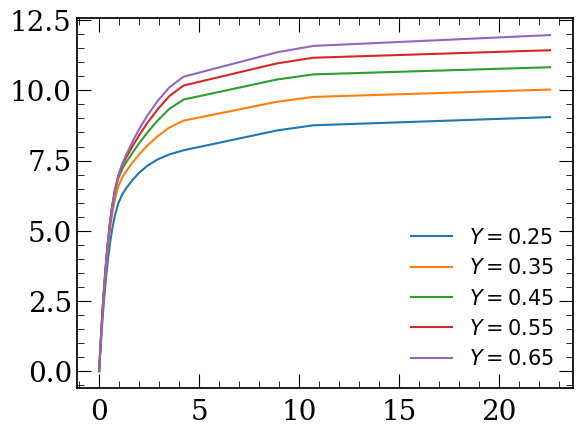

In [5]:
logpgrid = np.linspace(6, 14, 100)

y_arr =[0.25, 0.35, 0.45, 0.55, 0.65]

for y in y_arr:
    y_ = np.full_like(logpgrid, y)
    pmisc, tmisc = misc.get_misc_p(logpgrid, y_, misc='l', delta_T=0)
    plt.plot(pmisc, tmisc, label='$Y = {}$'.format(y))
    
plt.minorticks_on()

plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.legend(frameon=False, prop={'size':15})
plt.show()

## Schöttler & Redmer (2018)

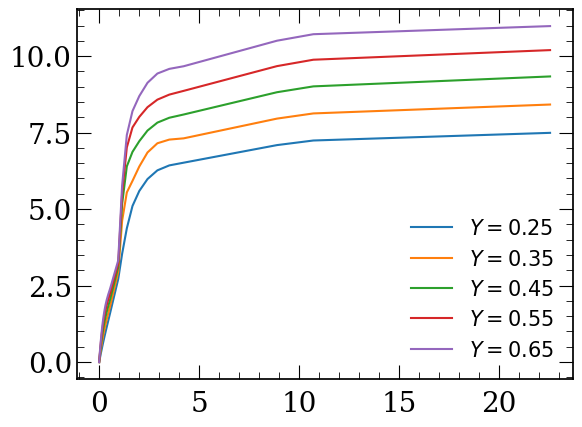

In [6]:
logpgrid = np.linspace(6, 14, 100)

y_arr =[0.25, 0.35, 0.45, 0.55, 0.65]

for y in y_arr:
    y_ = np.full_like(logpgrid, y)
    pmisc, tmisc = misc.get_misc_p(logpgrid, y_, misc='s', delta_T=0)
    plt.plot(pmisc, tmisc, label='$Y = {}$'.format(y))
    
plt.minorticks_on()

plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.legend(frameon=False, prop={'size':15})
plt.show()

# Immiscibility regions

The `misc` module provides intercept calculations to readily obtain the immiscibility regions given a pressure-temperature profile. Let's define a pressure profile

In [14]:
from eos import cms_eos
from scipy.interpolate import interp1d

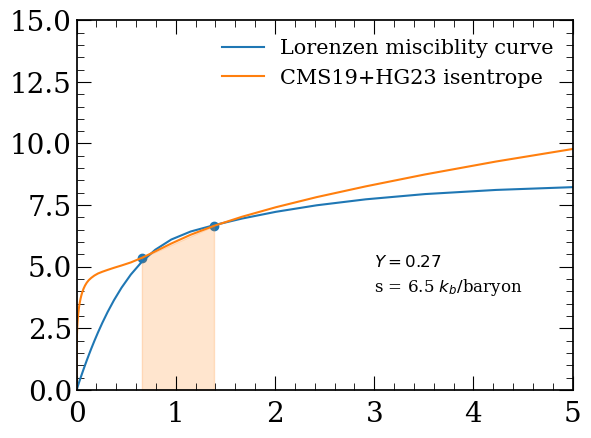

In [35]:
logpgrid = np.linspace(6, 14, 100)
s = np.full_like(logpgrid, 6.5)
y = np.full_like(logpgrid, 0.27)

logrho, logt = cms_eos.get_rhot_sp_tab(s, logpgrid, y)

pmisc, tmisc = misc.get_misc_p(logpgrid, y, misc='l', delta_T=0)

pgap = misc.get_pgap(logpgrid, logt, y, misc='l')
interp_t = interp1d(10**(logpgrid-12), 10**(logt-3), kind='linear')
tgap = interp_t(pgap*1e-12)

plt.plot(pmisc, tmisc, label='Lorenzen misciblity curve')
plt.plot(10**(logpgrid-12), 10**(logt-3), label='CMS19+HG23 isentrope')
plt.scatter(pgap*1e-12, tgap)
plt.fill_between(pgap*1e-12, tgap, color='C1', alpha=0.2)

plt.legend(frameon=False, prop={'size':15})

plt.xlim(0, 5)
plt.ylim(0, 15)
plt.text(3, 5.0, '$Y = 0.27$', size=12)
plt.text(3, 4, 's = 6.5 $k_b/$baryon', size=12)
plt.gca().yaxis.set_ticks_position('both')
plt.gca().xaxis.set_ticks_position('both')
plt.minorticks_on()
plt.show()

Note that the `get_pgap` function takes in the profile pressure and temperatures, but the miscibility tables are limited to $1 \leq \rm{P[Mbar]} \leq 24$ for the Lorenze et al. curves, and within $0.5 \leq \rm{P[Mbar]} \leq 24$ for the SR18 curves. As a result, the miscibility curve (in blue above) will not span the entirety of the profile. 

The `get_pgap` function returns the intercept points along pressure only. For visualization purposes, I interpolated the temperature to provide a Y-axis to the gap.

Since the miscibility curves (demixing temperatures) are functions of pressure and helium mass fraction, the demixing temprature profiles will adjust to accomodate pressure and helium mass fraction gradients. 

This is crucial for evolutionary calculations since the interior helium distirbution will not stay constant, so the miscibility curves should adapt according to the helium profiles. 

Please see Tejada Arevalo et al. (2024) for more in-depth discussion of the various miscibility curves.